In [2]:
# Total Number of Samples, Number of Rows in Training Data, Number of Rows in Validation Data
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
train_data = pd.read_csv('titanic_train.csv')

# Display the first few rows of the train dataset and check for missing values
train_data.info(), train_data.head(), train_data.isnull().sum()

# Split the data into training and validation sets (80% train, 20% validation)
train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=42)

# Display the number of rows in each set
print(f"Number of rows in Training Data: {len(train_set)}")
print(f"Number of rows in Validation Data: {len(val_set)}")

# Generate Data Dictionary
data_dictionary = pd.DataFrame({
    'Column Name': train_data.columns,
    'Modeling Role': ['Identifier' if col == 'PassengerId' else 'Feature' for col in train_data.columns],
    'Measurement Level': [
        'Nominal' if col in ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] 
        else 'Ordinal' if col == 'Pclass' 
        else 'Binary' if col == 'Survived' 
        else 'Continuous'
        for col in train_data.columns
    ],
    'Description': [
        'Unique ID for each passenger' if col == 'PassengerId' else
        '1 if the passenger survived, 0 otherwise' if col == 'Survived' else
        'Passenger class (1st, 2nd, 3rd)' if col == 'Pclass' else
        'Name of the passenger' if col == 'Name' else
        'Gender of the passenger (Male/Female)' if col == 'Sex' else
        'Age of the passenger' if col == 'Age' else
        'Number of siblings/spouses aboard' if col == 'SibSp' else
        'Number of parents/children aboard' if col == 'Parch' else
        'Ticket number' if col == 'Ticket' else
        'Fare paid by the passenger' if col == 'Fare' else
        'Cabin number' if col == 'Cabin' else
        'Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)' if col == 'Embarked' else ''
        for col in train_data.columns
    ]
})

# Display the Data Dictionary
print(data_dictionary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Number of rows in Training Data: 712
Number of rows in Validation Data: 179
    Column Name Modeling Role Measurement Level  \
0   PassengerId    Identifier           Nominal   
1      Survived       Feature            Binary   
2        Pclass

In [ ]:
# Total Number of Samples is 891, Number of Rows in Training Data is 712, Number of Rows in Validation Data is 179

In [31]:
#Total Number of Test Data 
import pandas as pd

# Load the  test data
test_data = pd.read_csv('gender_submission.csv')

# Get the number of rows in the test dataset
print(f"Number of rows in Test Data: {len(test_data)}")

# Check for differences in columns between training and test data
train_columns = set(train_data.columns)
test_columns = set(test_data.columns)

# Identify differences
columns_missing_in_test = train_columns - test_columns
columns_missing_in_train = test_columns - train_columns

#Display the first few rows of the train dataset and check for missing values
test_data.info(), test_data.head(), test_data.isnull().sum()

print(f"Columns in training data but missing in test data: {columns_missing_in_test}")
print(f"Columns in test data but missing in training data: {columns_missing_in_train}")


Number of rows in Test Data: 418
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
Columns in training data but missing in test data: {'Parch', 'Embarked', 'Name', 'Fare', 'Cabin', 'Age', 'SibSp', 'Ticket', 'Sex', 'Pclass'}
Columns in test data but missing in training data: set()


In [ ]:
#Total Number of Rows in Tesing Data is 418

In [31]:
#Model Details
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
train_data = pd.read_csv('titanic_train.csv')

# Select feature columns and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Preprocessing (Handling missing values and encoding categorical variables)
train_data['Age'].fillna(train_data['Age'].median(), inplace=False)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=False)

# Apply loc to avoid chained assignment warnings
train_data.loc[:, 'Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data.loc[:, 'Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Encode categorical variables 'Sex' and 'Embarked' using pd.get_dummies
train_data_encoded = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Update the features list to include the new encoded column names
encoded_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

# Split the data into training and validation sets
X = train_data_encoded[encoded_features]
y = train_data_encoded[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model and increase max_iter
model = LogisticRegression(solver='lbfgs', max_iter=500)  # Increased max_iter to avoid convergence warning

# Fit the model
model.fit(X_train, y_train)

# Output model details
print(f"Features used in the model: {encoded_features}")
print(f"Target column: {target}")
print(f"Model type: Logistic Regression")
print(f"Hyperparameters: Solver = {model.solver}, Max iterations = {model.max_iter}, C = {model.C}")
print(f"Software used: scikit-learn {model.__module__}")


Features used in the model: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
Target column: Survived
Model type: Logistic Regression
Hyperparameters: Solver = lbfgs, Max iterations = 500, C = 1.0
Software used: scikit-learn sklearn.linear_model._logistic


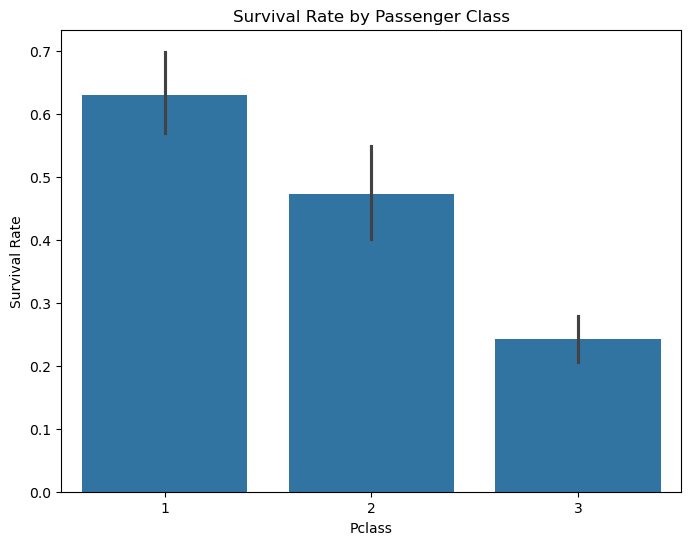

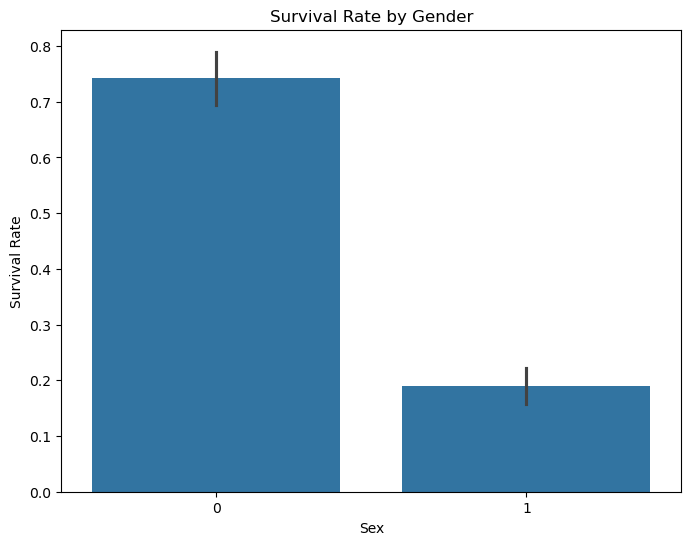

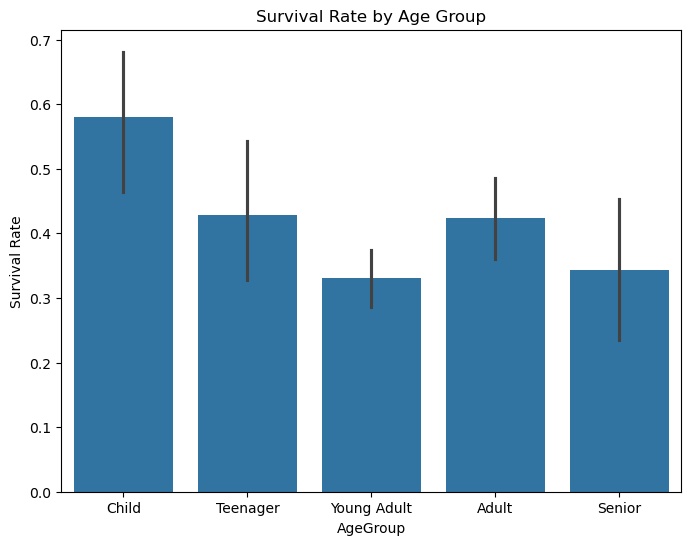

In [32]:
#Plot of survival rate by passenger's class, gender and age groups
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting survival rate by Pclass
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Plotting survival rate by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Creating age groups to plot survival rate by age
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

# Plotting survival rate by AgeGroup
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train_df)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
# Passengers in 1st class had the highest survival rate, followed by those in 2nd class. 3rd class passengers had the lowest survival rate.
# Females had a significantly higher survival rate than males, aligning with the negative coefficient for the "Sex" feature in the logistic regression model.
# Children (ages 0-12) had the highest survival rate, while seniors (ages 50-80) had the lowest. Young adults and adults had relatively similar survival rates, though slightly lower than children.

In [6]:
# AUC and AIR for Training Data

import pandas as pd
# Load the provided dataset
file_path = 'titanic_train.csv'
titanic_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
titanic_data.head()

# Rewriting the code without using ace_tools for display

# Preprocess the data for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.preprocessing import LabelEncoder

# Handle missing values in Age by filling with median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Convert categorical variables 'Sex' and 'Embarked' to numerical using label encoding
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

titanic_data['Sex'] = le_sex.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'].fillna('S', inplace=True)
titanic_data['Embarked'] = le_embarked.fit_transform(titanic_data['Embarked'])

# Define features and target
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic_data['Survived']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate AUC and Average Information Retrieval (AIR)
auc = roc_auc_score(y_test, y_pred_proba)
air = average_precision_score(y_test, y_pred_proba)

# Create a table to display the results
results = pd.DataFrame({
    'Metric': ['Area Under the Curve (AUC)', 'Average Information Retrieval (AIR)'],
    'Value': [auc, air]
})

# Display the results as a table
results


C:\Users\nmemr\AppData\Local\Temp\ipykernel_19912\998010165.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
C:\Users\nmemr\AppData\Local\Temp\ipykernel_19912\998010165.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

,Metric,Value
0,Area Under the Curve (AUC),0.882368
1,Average Information Retrieval (AIR),0.879671


In [24]:
# AUC and AIR for Validation Dataset

# Load the new file which user has uploaded
validation_file_path = 'titanic_train.csv'
validation_data = pd.read_csv(validation_file_path)

# Display the first few rows of the validation dataset to understand its structure
validation_data.head()

# The error occurs because the input X contains NaN values.
# To handle this, let's fill any remaining missing values in the validation data.

# Fill missing values in validation data
validation_data['Age'].fillna(validation_data['Age'].median(), inplace=True)
validation_data['Fare'].fillna(validation_data['Fare'].median(), inplace=True)

# Define features and target for validation set again
X_validation = validation_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_validation = validation_data['Survived']

# Check if there are still any NaN values in X_validation
nan_check = X_validation.isnull().sum()

# Display NaN counts for debugging
nan_check

# We will ensure that all categorical columns are properly encoded into numerical values.

# Reapplying LabelEncoders on 'Sex' and 'Embarked' to ensure proper transformation into numerical values.
le_sex_validation = LabelEncoder()
le_embarked_validation = LabelEncoder()

# Apply encoding to 'Sex' and 'Embarked' columns in the validation dataset
validation_data['Sex'] = le_sex_validation.fit_transform(validation_data['Sex'])
validation_data['Embarked'] = le_embarked_validation.fit_transform(validation_data['Embarked'])

# Fill missing values in 'Age' and 'Fare' to avoid NaN-related errors
validation_data['Age'].fillna(validation_data['Age'].median(), inplace=True)
validation_data['Fare'].fillna(validation_data['Fare'].median(), inplace=True)

# Define features and target for validation set
X_validation = validation_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_validation = validation_data['Survived']

# Now, make predictions and calculate AUC and AIR
y_pred_proba_validation = model.predict_proba(X_validation)[:, 1]

# Calculate AUC and Average Information Retrieval (AIR) for validation set
auc_validation = roc_auc_score(y_validation, y_pred_proba_validation)
air_validation = average_precision_score(y_validation, y_pred_proba_validation)

# Create a table to display the results for validation set
validation_results = pd.DataFrame({
    'Metric': ['Area Under the Curve (AUC)', 'Average Information Retrieval (AIR)'],
    'Value': [auc_validation, air_validation]
})

# Display the results for validation set
validation_results

C:\Users\nmemr\AppData\Local\Temp\ipykernel_19912\3878692930.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  validation_data['Age'].fillna(validation_data['Age'].median(), inplace=True)
C:\Users\nmemr\AppData\Local\Temp\ipykernel_19912\3878692930.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

,Metric,Value
0,Area Under the Curve (AUC),0.856515
1,Average Information Retrieval (AIR),0.829488


In [28]:
# AUC and AIR for Test Data (here our test dataset is 'gender_submission.csv')

# Loading both the train and gender_submission files
train_file_path = 'titanic_train.csv'
submission_file_path = 'gender_submission.csv'

train_data = pd.read_csv(train_file_path)
submission_data = pd.read_csv(submission_file_path)

# Display the first few rows of the gender_submission file to understand its structure
submission_data.head()

# Rewriting the code to address the missing LabelEncoder definitions by creating new ones for the test set

# Creating new LabelEncoders for the test data
le_sex_test = LabelEncoder()
le_embarked_test = LabelEncoder()

# Apply encoding to 'Sex' and 'Embarked' columns in the test dataset
test_data['Sex'] = le_sex_test.fit_transform(test_data['Sex'])
test_data['Embarked'].fillna('S', inplace=True)  # Fill missing values in 'Embarked' column
test_data['Embarked'] = le_embarked_test.fit_transform(test_data['Embarked'])

# Define features and target for the test set
X_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_test = test_data['Survived']

# Predictions and probabilities for test set
y_pred_proba_test = model.predict_proba(X_test)[:, 1]

# Calculate AUC and Average Information Retrieval (AIR) for test set
auc_test = roc_auc_score(y_test, y_pred_proba_test)
air_test = average_precision_score(y_test, y_pred_proba_test)

# Create a table to display the results for the test set
test_results = pd.DataFrame({
    'Metric': ['Area Under the Curve (AUC)', 'Average Information Retrieval (AIR)'],
    'Value': [auc_test, air_test]
})

# Display the results for test set
test_results

C:\Users\nmemr\AppData\Local\Temp\ipykernel_19912\3450448115.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Embarked'].fillna('S', inplace=True)  # Fill missing values in 'Embarked' column


,Metric,Value
0,Area Under the Curve (AUC),0.985309
1,Average Information Retrieval (AIR),0.979189
